<center><img src=img/MScAI_brand.png width=70%></center>

# Topological Sort

A **directed graph** is a graph where edges have a direction. E.g. in real life, if you and I are friends, than one undirected edge represents that. But e.g. on Twitter, "I follow you" is not the same as "you follow me". So, the edge `(me, you)` is not the same as the edge `(you, me)`.

A **topological sort** is an ordering of the nodes of a directed graph which respects all edge directions.

Applications of topological sort:
* Project planning
* Data-flow graphs
* Build systems
* Software installation

### Project planning

In project management, we often decompose a project into a large list of tasks to be accomplished by many different people using various resources. Some of these tasks have *dependencies*: task $j$ cannot be started until we have the output of task $i$. This induces a directed graph. 

<center><img src=img/build_house.png width=50%></center>

Assuming no cycles, we can perform a topological sort. It gives us an ordering of the tasks so that for any dependency $(i, j)$, task $j$ is sorted *after* task $i$. Creating this ordering allows us to create a timeline and identify tasks which can be done in parallel.

1. Buy bricks
2. Build walls
3. Buy wood
4. Build roof
5. Buy door
6. Install door

As you can see, the topological sort is not unique.

### Data-flow graphs

Nodes are computations, and edges represent the outputs being used as inputs in other computations. E.g., in Excel:

* Cell `A10` has formula `=SUM(A1:A9)`
* Cell `C10` has formula `=A10 + B10`
* Cell `B10` has formula `=SIN(B3)`
* Cell range `A1:A9` contains numbers
* Cell `B3` contains a number

 <table>
  <tr>
    <td><img src=img/excel-dataflow1.png width=80%></td>
    <td><img src=img/excel-dataflow2.png width=80%></td>
  </tr>
</table> 

If the user makes a change to a value somewhere, Excel will update the rest of the spreadsheet in response. But in what **order** can it carry out the updates?


### Software installation

A related example is the dependency graph of software libraries. As we know:
* Seaborn can only work if Matplotlib is installed; 
* Scipy requires Numpy;
* Pandas requires Numpy;
* and so on.

A classic problem in software management: recursively finding all the necessary dependencies for a library.

Next time you install a new library using Anaconda, take a look at all the other libraries that it depends on.

### Build systems

You might know `make` or `ant` or another build system. Their job is to build software, taking account of interdependencies. For example:

* `lib.o` depends on `lib.c` and `header.h`
* `prog.o` depends on `prog.c` and `header.h`
* `prog.exe` depends on `lib.o` and `prog.o`

If `lib.c` changes, and we want to build `prog.exe`, what steps do we need to run?


Each "depends on" line gives a directed edge, so we have a *directed acyclic graph*.

In all of these cases, we have a directed graph, and an edge represents that we have to do one task before we can do another. And the overall question is: what order can we do all tasks?

### Implementing topological sort

$D$ is a directed graph
    
1. Create output as empty list.
2. Find any node $n$ of in-degree 0. If none exist, we fail.
3. Append $n$ to output, remove it from graph, and remove all its edges.
4. Repeat from 2 until graph is empty.

In [6]:
def topological_sort(D):
    output = [] # step 1
    D = D.copy() # avoid changing input itself
    while D.order(): # step 4: while nodes remain, repeat
        remove_node = None 
        for n in D: # n is a node
            if D.in_degree(n) == 0: # step 2
                # can't remove n from D *while iterating over D*, 
                # so remember which node to remove...
                remove_node = n
                break # ... and exit loop
        if remove_node is not None: 
            # step 3
            output.append(remove_node) 
            D.remove_node(remove_node) # nx will remove edges
        else:
            # if there's no node with in-degree 0
            raise ValueError("A cycle is present!")
    return output

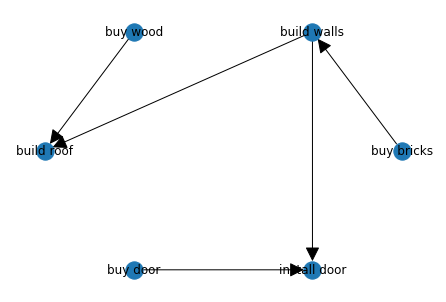

In [13]:
# let's make a simple graph with no cycle
import networkx as nx
D = nx.DiGraph()
D.add_edge("buy bricks", "build walls")
D.add_edge("buy wood", "build roof")
D.add_edge("buy door", "install door")
D.add_edge("build walls", "build roof")
D.add_edge("build walls", "install door")
nx.draw_circular(D, with_labels=True, arrowsize=30)

In [8]:
topological_sort(D)

['buy bricks',
 'build walls',
 'buy wood',
 'build roof',
 'buy door',
 'install door']

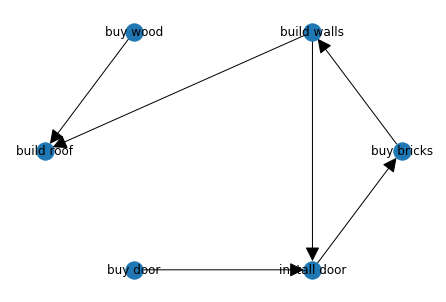

In [14]:
# let's make a simple graph, WITH a cycle
D = nx.DiGraph()
D.add_edge("buy bricks", "build walls")
D.add_edge("buy wood", "build roof")
D.add_edge("buy door", "install door")
D.add_edge("build walls", "build roof")
D.add_edge("build walls", "install door")
D.add_edge("install door", "buy bricks")
nx.draw_circular(D, with_labels=True, arrowsize=30)

In [15]:
topological_sort(D) # we expect the ValueError

ValueError: A cycle is present!